In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
#import tensorflow as tf
import cv2
import numpy as np

In [2]:
import os
import sys
import nibabel as nib
from utils.preprocessing.numpy import *
import matplotlib.pyplot as plt
import skimage.transform as sk

In [3]:
from IPython.display import clear_output

In [4]:
def window_image(image, window_center=60, window_width=120, mod="CT"):
    if mod=="DWI":
        window_center=3032
        window_width=6063
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

In [6]:
#ADC SS
pathmain = "/data/Datasets/stroke/APIS/train/"
output_path_png = "/data/Datasets/stroke/ggarzon/foscal_png/adcss/"
output_path_png_mask = "/data/Datasets/stroke/ggarzon/foscal_png/ncctmask/"
output_path_jpg = "/data/Datasets/stroke/ggarzon/foscal_jpg/adcss/"
output_path_jpg_mask = "/data/Datasets/stroke/ggarzon/foscal_jpg/ncctmask/"

output_empty_mask = "/data/Datasets/stroke/ggarzon/foscal_png/empty_mask.png"
output_empty_mask_jpg = "/data/Datasets/stroke/ggarzon/foscal_jpg/empty_mask.jpg"

In [7]:
lista2 = [
["train_000","ACV-002","/data/Datasets/stroke/ISBI_FOSCAL/ACV-002/Masks/Daniel/ADC.nii.gz",10,23],
["train_001","ACV-005","/data/Datasets/stroke/ISBI_FOSCAL/ACV-005/Masks/Daniel/ADC.nii.gz",9,21],

["train_002","ACV-006","/data/Datasets/stroke/ISBI_FOSCAL/ACV-006/Masks/Daniel/ADC.nii.gz",8,24],
["train_003","ACV-014","/data/Datasets/stroke/ISBI_FOSCAL/ACV-014/Masks/Daniel/ADC.nii.gz",9,24],
["train_004","ACV-019","/data/Datasets/stroke/ISBI_FOSCAL/ACV-019/Masks/Daniel/ADC.nii.gz",8,22],
["train_005","ACV-021","/data/Datasets/stroke/ISBI_FOSCAL/ACV-021/Masks/Daniel/ADC.nii.gz",8,21],
["train_006","ACV-031","/data/Datasets/stroke/ISBI_FOSCAL/ACV-031/Masks/Daniel/ADC.nii.gz",9,24],
    ["train_007","ACV-032","normal",8,23],
["train_008","ACV-033","/data/Datasets/stroke/ISBI_FOSCAL/ACV-033/Masks/Daniel/ADC.nii.gz",7,19],
["train_009","ACV-034","/data/Datasets/stroke/ISBI_FOSCAL/ACV-034/Masks/Daniel/ADC.nii.gz",8,23],
["train_010","ACV-036","/data/Datasets/stroke/ISBI_FOSCAL/ACV-036/Masks/Daniel/ADC.nii.gz",8,22],
["train_011","ACV-043","/data/Datasets/stroke/ISBI_FOSCAL/ACV-043/Masks/Daniel/ADC.nii.gz",7,19],
    ["train_012","ACV-044","normal",8,22],
["train_013","ACV-046","/data/Datasets/stroke/ISBI_FOSCAL/ACV-046/Masks/Daniel/ADC.nii.gz",9,24],
["train_014","ACV-049","/data/Datasets/stroke/ISBI_FOSCAL/ACV-049/Masks/Andres/ADC.nii.gz",10,24],
["train_015","ACV-051","/data/Datasets/stroke/ISBI_FOSCAL/ACV-051/Masks/Daniel/ADC.nii.gz",10,23],
["train_016","ACV-052","/data/Datasets/stroke/ISBI_FOSCAL/ACV-052/Masks/Daniel/ADC.nii.gz",9,22],
["train_017","ACV-053","/data/Datasets/stroke/ISBI_FOSCAL/ACV-053/Masks/Andres/ADC.nii.gz",9,21],
["train_018","ACV-054","/data/Datasets/stroke/ISBI_FOSCAL/ACV-054/Masks/Andres/ADC.nii.gz",9,22],
["train_019","ACV-055","/data/Datasets/stroke/ISBI_FOSCAL/ACV-055/Masks/Andres/ADC.nii.gz",9,22],
["train_020","ACV-056","/data/Datasets/stroke/ISBI_FOSCAL/ACV-056/Masks/Andres/ADC.nii.gz",8,21],
["train_021","ACV-057","/data/Datasets/stroke/ISBI_FOSCAL/ACV-057/Masks/Andres/ADC.nii.gz",8,22],
["train_022","ACV-060","/data/Datasets/stroke/ISBI_FOSCAL/ACV-060/Masks/Andres/ADC.nii.gz",9,23],
    ["train_023","ACV-062","normal",9,22],
["train_024","ACV-132","/data/Datasets/stroke/ISBI_FOSCAL/ACV-132/Masks/Daniel/ADC.nii.gz",9,23],
["train_025","ACV-065","/data/Datasets/stroke/ISBI_FOSCAL/ACV-065/Masks/Andres/ADC.nii.gz",9,23],
["train_026","ACV-133","/data/Datasets/stroke/ISBI_FOSCAL/ACV-133/Masks/Daniel/ADC.nii.gz",8,22],
    ["train_027","ACV-140","normal",10,24],
["train_028","ACV-068","/data/Datasets/stroke/ISBI_FOSCAL/ACV-068/Masks/Andres/ADC.nii.gz",9,25],
["train_029","ACV-073","/data/Datasets/stroke/ISBI_FOSCAL/ACV-073/Masks/Andres/ADC.nii.gz",8,22],
["train_030","ACV-074","/data/Datasets/stroke/ISBI_FOSCAL/ACV-074/Masks/Andres/ADC.nii.gz",9,22],
["train_031","ACV-141","/data/Datasets/stroke/ISBI_FOSCAL/ACV-141/Masks/Daniel/ADC.nii.gz",10,24],
["train_032","ACV-142","/data/Datasets/stroke/ISBI_FOSCAL/ACV-142/Masks/Daniel/ADC.nii.gz",9,24],
["train_033","ACV-081","/data/Datasets/stroke/ISBI_FOSCAL/ACV-081/Masks/Andres/ADC.nii.gz",7,21],
["train_034","ACV-082","/data/Datasets/stroke/ISBI_FOSCAL/ACV-082/Masks/Andres/ADC.nii.gz",8,22],
["train_035","ACV-086","/data/Datasets/stroke/ISBI_FOSCAL/ACV-086/Masks/Andres/ADC.nii.gz",8,22],
["train_036","ACV-087","/data/Datasets/stroke/ISBI_FOSCAL/ACV-087/Masks/Daniel/ADC.nii.gz",7,23],
["train_037","ACV-088","/data/Datasets/stroke/ISBI_FOSCAL/ACV-088/Masks/Andres/ADC.nii.gz",9,24],
    ["train_038","ACV-047","normal",9,24],
["train_039","ACV-090","/data/Datasets/stroke/ISBI_FOSCAL/ACV-090/Masks/Andres/ADC.nii.gz",8,22],
["train_040","ACV-092","/data/Datasets/stroke/ISBI_FOSCAL/ACV-092/Masks/Andres/ADC.nii.gz",8,21],
["train_041","ACV-094","/data/Datasets/stroke/ISBI_FOSCAL/ACV-094/Masks/Daniel/ADC.nii.gz",8,21],
["train_042","ACV-095","/data/Datasets/stroke/ISBI_FOSCAL/ACV-095/Masks/Daniel/ADC.nii.gz",7,20],
    ["train_043","ACV-076","normal",8,19],
["train_044","ACV-099","/data/Datasets/stroke/ISBI_FOSCAL/ACV-099/Masks/Daniel/ADC.nii.gz",8,21],
["train_045","ACV-103","/data/Datasets/stroke/ISBI_FOSCAL/ACV-103/Masks/Daniel/ADC.nii.gz",9,24],
["train_046","ACV-104","/data/Datasets/stroke/ISBI_FOSCAL/ACV-104/Masks/Daniel/ADC.nii.gz",9,21],
["train_047","ACV-105","/data/Datasets/stroke/ISBI_FOSCAL/ACV-105/Masks/Daniel/ADC.nii.gz",9,23],
    
    ["train_048","ACV-107","normal",8,21],
["train_049","ACV-108","/data/Datasets/stroke/ISBI_FOSCAL/ACV-108/Masks/Daniel/ADC.nii.gz",9,21],
["train_050","ACV-109","/data/Datasets/stroke/ISBI_FOSCAL/ACV-109/Masks/Daniel/ADC.nii.gz",10,24],
    ["train_051","ACV-110","normal",9,24],
["train_052","ACV-112","/data/Datasets/stroke/ISBI_FOSCAL/ACV-112/Masks/Daniel/ADC.nii.gz",8,23],
["train_053","ACV-118","/data/Datasets/stroke/ISBI_FOSCAL/ACV-118/Masks/Daniel/ADC.nii.gz",8,22],
["train_054","ACV-121","/data/Datasets/stroke/ISBI_FOSCAL/ACV-121/Masks/Daniel/ADC.nii.gz",8,20],
["train_055","ACV-122","/data/Datasets/stroke/ISBI_FOSCAL/ACV-122/Masks/Daniel/ADC.nii.gz",8,22],
["train_056","ACV-123","/data/Datasets/stroke/ISBI_FOSCAL/ACV-123/Masks/Daniel/ADC.nii.gz",9,23],
["train_057","ACV-125","/data/Datasets/stroke/ISBI_FOSCAL/ACV-125/Masks/Daniel/ADC.nii.gz",9,22],
    ["train_058","ACV-128","normal",8,21],
    ["train_059","ACV-129","normal",8,22],
]

In [8]:
def myresizer(file):
    imgnii = nib.load(file).get_fdata()
    if imgnii.shape[0] != 256:
        if imgnii.shape[1] == 256:
            imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:,:]
        else:
            #los otros
            imgnii2 = []
            for s in range(imgnii.shape[2]):
                newh = np.ceil(256*imgnii.shape[0]/imgnii.shape[1])
                imgnii2.append(sk.resize(imgnii[:,:,s], (newh,256)))
            imgnii = np.array(imgnii2).transpose(1,2,0)
            imgnii = imgnii[int((newh-256)/2):int((newh-256)/2)+256,:,:]
    return imgnii

## NCCT (SS)

## ADC (SS)

train_000/train_000_adc.nii.gz
(256, 256, 26)
10,11,12,13,14,15,16,17,18,19,20,21,22,23,
train_001/train_001_adc.nii.gz
(256, 256, 23)
9,10,11,12,13,14,15,16,17,18,19,20,21,
train_002/train_002_adc.nii.gz
(256, 256, 26)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_003/train_003_adc.nii.gz
(256, 256, 26)
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_004/train_004_adc.nii.gz
(256, 256, 24)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
train_005/train_005_adc.nii.gz
(256, 256, 24)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,
train_006/train_006_adc.nii.gz
(256, 256, 26)
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_007/train_007_adc.nii.gz
(256, 256, 26)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
train_008/train_008_adc.nii.gz
(256, 256, 20)
7,8,9,10,11,12,13,14,15,16,17,18,19,
train_009/train_009_adc.nii.gz
(256, 256, 26)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
train_010/train_010_adc.nii.gz
(256, 256, 24)
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
train_

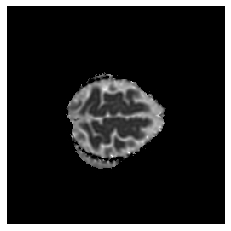

In [10]:
for f in lista2:
    file = f[0]+"/"+f[0]+"_adc.nii.gz" #train_000_ncct.nii.gz
    #numid = f.split("_")[1]
    #print(numid[1])
    #file = "train_"+numid+"_ncct.nii.gz"
    imgnii = nib.load(pathmain+file).get_fdata()
    #imgnii = window_image(imgnii)
    #imgnii = myresizer(pathmain+file)
    ns = imgnii.shape[2]
    print(file)
    if imgnii.shape[0] != imgnii.shape[1]:
        if imgnii.shape[1] == 256:
            #sano
            #print(int((imgnii.shape[0]-256)/2))
            imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        else:
            #los otros
            imgnii2 = []
            for s in range(imgnii.shape[2]):
                newh = np.ceil(256*imgnii.shape[0]/imgnii.shape[1])
                #imgnii[:,:,s] = sk.resize(imgnii[:,:,s], (newh,256))
                imgnii2.append(sk.resize(imgnii[:,:,s], (newh,256)))
            imgnii = np.array(imgnii2).transpose(1,2,0)
            imgnii = imgnii[int((newh-256)/2):int((newh-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        #print("diferentes")
    if imgnii.shape[0]==288:
        imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:]
    print(imgnii.shape)
    plt.axis("off")
    for s in range(imgnii.shape[2]):
        #if np.sum(imgnii[:,:,s]) != 0:
        if (s+1)>=f[3] and (s+1)<=f[4]:
            print(str(s+1)+",", end="")
            plt.imshow(imgnii[:,:,s], cmap="gray")
            outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".jpg"
            plt.imsave(output_path_jpg+outputfile, imgnii[:,:,s], cmap="gray")
            outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".png"
            plt.imsave(output_path_png+outputfile, imgnii[:,:,s], cmap="gray")
    print("", end="\n")
    
#     file = f[0]+"/masks/"+f[0]+"_r1_mask.nii.gz" #train_000_r1_mask.nii.gz
#     #if True:
#     if f[2]=="normal":
#         print(imgnii.shape, "mask")
#         for s in range(ns):
#             if (s+1)>=f[3] and (s+1)<=f[4]:
#                 print(str(s+1)+",", end="")
#                 outputfile = f[0]+"_maskncct_"+str(s+1)+".png"
#                 mycmd = ""
#                 mycmd += "cp -r "+output_empty_mask+" "
#                 mycmd += output_path_png_mask+outputfile
#                 os.system(mycmd)
                
#                 outputfile = f[0]+"_maskncct_"+str(s+1)+".jpg"
#                 mycmd = ""
#                 mycmd += "cp -r "+output_empty_mask_jpg+" "
#                 mycmd += output_path_jpg_mask+outputfile
#                 os.system(mycmd)
#         print("", end="\n")
#     else:
#         imgnii = myresizer(pathmain+file)

#         print(imgnii.shape, "mask")
#         plt.axis("off")
#         for s in range(imgnii.shape[2]):
#             if (s+1)>=f[3] and (s+1)<=f[4]:
#                 print(str(s+1)+",", end="")
#                 #outputfile = file.split("/")[2].split(".")[0]+"_"+str(s+1)+".jpg"
#                 outputfile = f[0]+"_maskncct_"+str(s+1)+".jpg"
#                 plt.imsave(output_path_jpg_mask+outputfile, imgnii[:,:,s], cmap="gray")
#                 #outputfile = f[2].split(".")[0]+"_"+str(s+1)+".png"
#                 outputfile = f[0]+"_maskncct_"+str(s+1)+".png"
#                 plt.imsave(output_path_png_mask+outputfile, imgnii[:,:,s], cmap="gray")
#         print("", end="\n")
    #break
    #a = input()

print("ALL DONE")

## DWI

In [ ]:
for f in lista:
    numid = f.split("_")[1]
    #print(numid[1])
    file = "train_"+numid+"_dwi.nii.gz"
    imgnii = nib.load(path+f+"/"+file).get_fdata()
    #imgnii = window_image(imgnii)
    print(file)
    if imgnii.shape[0] != imgnii.shape[1]:
        if imgnii.shape[1] == 256:
            #sano
            #print(int((imgnii.shape[0]-256)/2))
            imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        else:
            #los otros
            imgnii2 = []
            for s in range(imgnii.shape[2]):
                newh = np.ceil(256*imgnii.shape[0]/imgnii.shape[1])
                #imgnii[:,:,s] = sk.resize(imgnii[:,:,s], (newh,256))
                imgnii2.append(sk.resize(imgnii[:,:,s], (newh,256)))
            imgnii = np.array(imgnii2).transpose(1,2,0)
            imgnii = imgnii[int((newh-256)/2):int((newh-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        #print("diferentes")
    print(imgnii.shape)
    plt.axis("off")
    for s in range(imgnii.shape[2]):
        #if np.sum(imgnii[:,:,s]) != 0:
        print(str(s+1)+",", end="")
        plt.imshow(imgnii[:,:,s], cmap="gray")
        outputfile = file.split(".")[0]+"_"+str(s+1)+".jpg"
        plt.imsave(output_path_jpg+outputfile, imgnii[:,:,s], cmap="gray")
        outputfile = file.split(".")[0]+"_"+str(s+1)+".png"
        plt.imsave(output_path_png+outputfile, imgnii[:,:,s], cmap="gray")
    print("", end="\n")
    #a = input()

print("ALL DONE")

In [ ]:
for f in lista:
    numid = f.split("_")[1]
    #print(numid[1])
    file = "train_"+numid+"_adc.nii.gz"
    imgnii = nib.load(path+f+"/"+file).get_fdata()
    #imgnii = window_image(imgnii)
    print(file)
    if imgnii.shape[0] != imgnii.shape[1]:
        if imgnii.shape[1] == 256:
            #sano
            #print(int((imgnii.shape[0]-256)/2))
            imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        else:
            #los otros
            imgnii2 = []
            for s in range(imgnii.shape[2]):
                newh = np.ceil(256*imgnii.shape[0]/imgnii.shape[1])
                imgnii2.append(sk.resize(imgnii[:,:,s], (newh,256)))
            imgnii = np.array(imgnii2).transpose(1,2,0)
            imgnii = imgnii[int((newh-256)/2):int((newh-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        #print("diferentes")
    print(imgnii.shape)
    plt.axis("off")
    for s in range(imgnii.shape[2]):
        #if np.sum(imgnii[:,:,s]) != 0:
        print(str(s+1)+",", end="")
        plt.imshow(imgnii[:,:,s], cmap="gray")
        outputfile = file.split(".")[0]+"_"+str(s+1)+".jpg"
        plt.imsave(output_path_jpg+outputfile, imgnii[:,:,s], cmap="gray")
        outputfile = file.split(".")[0]+"_"+str(s+1)+".png"
        plt.imsave(output_path_png+outputfile, imgnii[:,:,s], cmap="gray")
    print("", end="\n")
    #a = input()

print("ALL DONE")

In [26]:
len(lista2)

60

In [29]:
for f in lista2:
    print(f[0])
    
    #file = f[0]+"/"+f[1]
    file = f[0]+"/"+f[0]+"_dwi.nii.gz"
    imgnii = myresizer(pathmain+file)
    ns = imgnii.shape[2]
    print(imgnii.shape, "dwi")
    plt.axis("off")
    #print("DEBUG",len(imgnii.shape))
    if len(imgnii.shape)>3:
        imgnii = imgnii[:,:,:,0]
    
    for s in range(imgnii.shape[2]):
        if (s+1)>=f[3] and (s+1)<=f[4]:
            print(str(s+1)+",", end="")
            outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".jpg"
            plt.imsave(output_path_jpg+outputfile, imgnii[:,:,s], cmap="gray")
            outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".png"
            #plt.imsave(output_path_png_adc+outputfile, imgnii[:,:,s], cmap="gray")
            plt.imsave(output_path_png+outputfile, imgnii[:,:,s], cmap="gray")
    print("", end="\n")
    
#     file = f[0]+"/"+f[0]+"_ncct.nii.gz"
#     imgnii = myresizer(file)
#     imgnii = window_image(imgnii)
    
#     print(imgnii.shape, "ncct")
#     plt.axis("off")
#     for s in range(imgnii.shape[2]):
#         if (s+1)>=f[3] and (s+1)<=f[4]:
#             print(str(s+1)+",", end="")
#             outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".jpg"
#             plt.imsave(output_path_jpg_ncct+outputfile, imgnii[:,:,s], cmap="gray")
#             outputfile = file.split("/")[1].split(".")[0]+"_"+str(s+1)+".png"
#             plt.imsave(output_path_png_ncct+outputfile, imgnii[:,:,s], cmap="gray")
#     print("", end="\n")
    
    #train_000_r1_mask.nii.gz
    #file = f[0]+"/masks/"+f[0]+"_r1_mask.nii.gz"
    #file = f[0]+"/"+f[2]
    file = f[0]+"/"+f[0]+"_maskdwi.nii.gz" #train_000_maskdwi.nii.gz
    #if True:
    if f[2]=="normal":
        print(imgnii.shape, "mask")
        for s in range(ns):
            if (s+1)>=f[3] and (s+1)<=f[4]:
                print(str(s+1)+",", end="")
                outputfile = f[0]+"_maskdwi_"+str(s+1)+".png"
                mycmd = ""
                mycmd += "cp -r "+output_empty_mask+" "
                mycmd += output_path_png_mask+outputfile
                os.system(mycmd)
                
                outputfile = f[0]+"_maskdwi_"+str(s+1)+".jpg"
                mycmd = ""
                mycmd += "cp -r "+output_empty_mask_jpg+" "
                mycmd += output_path_jpg_mask+outputfile
                os.system(mycmd)
        print("", end="\n")
    else:
        imgnii = myresizer(pathmain+file)

        print(imgnii.shape, "mask")
        plt.axis("off")
        for s in range(imgnii.shape[2]):
            if (s+1)>=f[3] and (s+1)<=f[4]:
                print(str(s+1)+",", end="")
                #outputfile = file.split("/")[2].split(".")[0]+"_"+str(s+1)+".jpg"
                outputfile = f[0]+"_maskdwi_"+str(s+1)+".jpg"
                plt.imsave(output_path_jpg_mask+outputfile, imgnii[:,:,s], cmap="gray")
                #outputfile = f[2].split(".")[0]+"_"+str(s+1)+".png"
                outputfile = f[0]+"_maskdwi_"+str(s+1)+".png"
                plt.imsave(output_path_png_mask+outputfile, imgnii[:,:,s], cmap="gray")
        print("", end="\n")
    #break

print("ALL DONE")

train_000
(256, 256, 26, 2) dwi
10,11,12,13,14,15,16,17,18,19,20,21,22,23,
(256, 256, 26) mask
10,11,12,13,14,15,16,17,18,19,20,21,22,23,
train_001
(256, 256, 23) dwi
9,10,11,12,13,14,15,16,17,18,19,20,21,
(256, 256, 23) mask
9,10,11,12,13,14,15,16,17,18,19,20,21,
train_002
(256, 256, 26, 2) dwi
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
(256, 256, 26) mask
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_003
(256, 256, 26, 2) dwi
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
(256, 256, 26) mask
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_004
(256, 256, 24, 2) dwi
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
(256, 256, 24) mask
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
train_005
(256, 256, 24, 2) dwi
8,9,10,11,12,13,14,15,16,17,18,19,20,21,
(256, 256, 24) mask
8,9,10,11,12,13,14,15,16,17,18,19,20,21,
train_006
(256, 256, 26, 2) dwi
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
(256, 256, 26) mask
9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
train_007
(25

8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
(256, 256, 24) mask
8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,
ALL DONE


In [ ]:
for f in lista2:
    #numid = f.split("_")[1]
    print(f[2])
    #file = "train_"+numid+"_adc.nii.gz"
    #imgnii = nib.load(path+f+"/"+file).get_fdata()
    imgnii = nib.load(f[2]).get_fdata()
    #imgnii = window_image(imgnii)
    #print(file)
    if imgnii.shape[0] != imgnii.shape[1]:
        if imgnii.shape[1] == 256:
            #sano
            #print(int((imgnii.shape[0]-256)/2))
            imgnii = imgnii[int((imgnii.shape[0]-256)/2):int((imgnii.shape[0]-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        else:
            #los otros
            imgnii2 = []
            for s in range(imgnii.shape[2]):
                newh = np.ceil(256*imgnii.shape[0]/imgnii.shape[1])
                #imgnii[:,:,s] = sk.resize(imgnii[:,:,s], (newh,256))
                imgnii2.append(sk.resize(imgnii[:,:,s], (newh,256)))
            imgnii = np.array(imgnii2).transpose(1,2,0)
            imgnii = imgnii[int((newh-256)/2):int((newh-256)/2)+256,:,:]
            #print("nuevo shape",imgnii.shape)
        #print("diferentes")
    print(imgnii.shape)
    plt.axis("off")
    for s in range(imgnii.shape[2]):
        #if np.sum(imgnii[:,:,s]) != 0:
        print(str(s+1)+",", end="")
        plt.imshow(imgnii[:,:,s], cmap="gray")
        outputfile = f[0]+"_mask_"+str(s+1)+".jpg"
        plt.imsave(output_path_jpg+outputfile, imgnii[:,:,s], cmap="gray")
        outputfile = f[0]+"_mask_"+str(s+1)+".png"
        plt.imsave(output_path_png+outputfile, imgnii[:,:,s], cmap="gray")
    print("", end="\n")
    #a = input()

print("ALL DONE")

## Mask mirroring

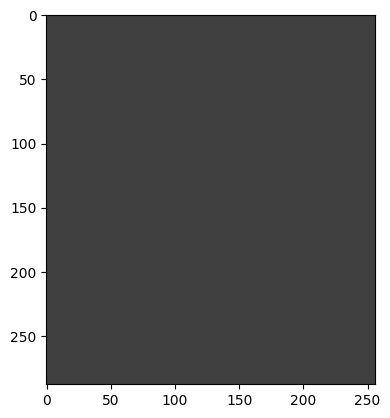

(288, 256, 23)


In [5]:
imgnii = nib.load("fixing/case005dwi.nii")
#imgniiadc = nib.load("xxx.nii.gz").get_fdata()
af = imgnii.affine
imgnii = imgnii.get_fdata()
#plt.imshow(imgniiadc[:,:,6], cmap="gray", alpha=1)
plt.imshow(imgnii[:,:,6], cmap="gray", alpha=0.5)

imgnii = np.flipud(imgnii)
plt.imshow(imgnii[:,:,6], cmap="gray", alpha=0.5)
plt.show()
print(imgnii.shape)

ni_img = nib.Nifti1Image(imgnii, af)
nib.save(ni_img, 'fixing/output.nii.gz')

## Mask indexing

In [93]:
import matplotlib.image as mpimg

mylist3 = os.listdir(output_path_png_mask)
mylist3.sort()

masked = 0

with open("mask_index.csv", "w") as f:
    line = "NCCT,ADC,MASK\n"
    f.write(line)
    for fn in mylist3:
        #print(fn)
        parts = fn.split("_")
        parts.remove("r1")
        parts[2] = "adc"
        fn_adc = "_".join(parts)
        #print(fn_adc)
        parts = fn.split("_")
        parts.remove("r1")
        parts[2] = "ncct"
        fn_ncct = "_".join(parts)
        #print(fn_ncct)
        myimg = mpimg.imread(output_path_png_mask+fn)
        myimg = myimg[:,:,0]
        if np.sum(myimg)>2:
            #print(fn)
            #print(np.sum(myimg))
            has_mask = 1
            masked += 1
        else:
            has_mask = 0
        line = fn_ncct+","+fn_adc+","+str(has_mask)+"\n"
        f.write(line)
        #break

f.close()
print(masked)

253
